In [3]:
%run HelperFunctions.ipynb

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
DATASET_DIR = "./Datasets/"
CLASS_LABEL = "rating_label"

In [7]:
train_df_ohe = pd.read_csv(DATASET_DIR + "train_df_ohe.csv", keep_default_na=False)  # Alternative
X_train = train_df_ohe.iloc[:,:-1]
y_train = train_df_ohe.iloc[:,-1]

In [8]:
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_predict

def tune_hyperparameter(clf, param_grid, X, y, scoring=report_scoring, cv=20, refit = False): 
    """
    
    """
    grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=cv, verbose=2, refit=refit, error_score="raise")
    
    grid_search.fit(X, y)
    result_df = pd.DataFrame.from_dict(grid_search.cv_results_)
    r = re.compile('^((mean|std|rank)_test|params).*')
    score_metrics = list(filter(r.match, result_df.columns))
    
    return result_df[score_metrics]

ComplementNB prediction took 0.5860528945922852 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.911765    0.052811      0.099839       0.715176    0.991363   
1       0.965517    0.047700      0.090909       0.714475    0.995682   
2       0.928571    0.066553      0.124204       0.716385    0.992597   
3       0.921053    0.059727      0.112179       0.716956    0.993831   
4       0.936170    0.075085      0.139021       0.717343    0.992597   
5       0.966667    0.049488      0.094156       0.714539    0.994448   
6       0.900000    0.046075      0.087662       0.714475    0.995682   
7       0.950000    0.064846      0.121406       0.719697    0.996299   
8       0.977778    0.074957      0.139241       0.718806    0.995679   
9       0.968750    0.052811      0.100162       0.714032    0.992593   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.830920       0.500000    0.131313      0.208000  0.715648  


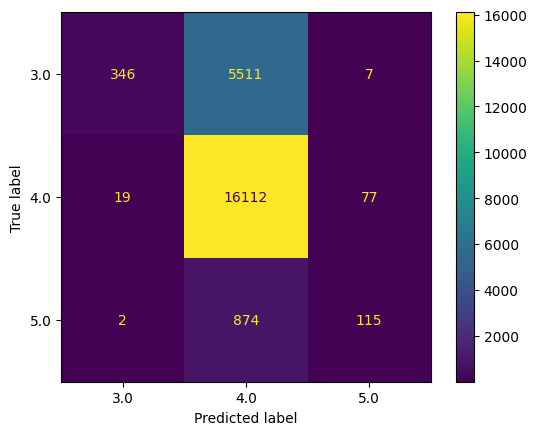

,mean,std
3.0_precision,0.942627,0.026974
3.0_recall,0.059005,0.010888
3.0_f1-score,0.110878,0.019266
4.0_precision,0.716188,0.001983
4.0_recall,0.994077,0.001726
4.0_f1-score,0.832555,0.001634
5.0_precision,0.577281,0.142503
5.0_recall,0.116081,0.032829
5.0_f1-score,0.192791,0.052511
accuracy,0.718597,0.003030


In [14]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=0.01, force_alpha=True, norm=True)
cross_val_report(clf, X_train, y_train)[1]

In [13]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 1.5],
    'norm': [True, False]}
results = tune_hyperparameter(clf, param_grid, X_train, y_train)
results

Fitting 20 folds for each of 10 candidates, totalling 200 fits
[CV] END ..............................alpha=0.01, norm=True; total time=   0.2s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.1s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0.01, norm=True; total time=   0.0s
[CV] END ..............................alpha=0

[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ..............................alpha=0.5, norm=False; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"{'alpha': 0.01, 'norm': True}",0.945986,0.045424,1,0.057806,0.013167,6,0.108675,0.023401,6,...,4,0.113857,0.035703,6,0.190743,0.055918,6,0.718727,0.004221,1
1,"{'alpha': 0.01, 'norm': False}",0.425822,0.024858,10,0.421384,0.024965,1,0.423324,0.022301,1,...,10,0.399531,0.059933,5,0.286692,0.035878,5,0.640333,0.012106,10
2,"{'alpha': 0.1, 'norm': True}",0.925419,0.063838,2,0.047232,0.011903,7,0.089671,0.021645,7,...,5,0.102755,0.039441,7,0.174754,0.063987,7,0.715822,0.004347,2
3,"{'alpha': 0.1, 'norm': False}",0.428408,0.025298,9,0.417630,0.025596,2,0.422649,0.022587,2,...,9,0.399531,0.057606,4,0.292987,0.036539,4,0.644062,0.012296,9
4,"{'alpha': 0.5, 'norm': True}",0.910386,0.093651,3,0.036493,0.009529,8,0.070055,0.017669,8,...,3,0.071510,0.032578,8,0.127697,0.055323,8,0.712874,0.003559,3
5,"{'alpha': 0.5, 'norm': False}",0.447059,0.027888,8,0.387278,0.028601,3,0.414679,0.025622,3,...,8,0.400633,0.062364,3,0.313830,0.043176,3,0.661362,0.011236,8
6,"{'alpha': 1, 'norm': True}",0.870335,0.174907,5,0.025238,0.010367,9,0.048906,0.019723,9,...,2,0.054388,0.031128,9,0.099522,0.055487,9,0.709838,0.003316,4
7,"{'alpha': 1, 'norm': False}",0.484756,0.033622,7,0.346351,0.032699,4,0.403619,0.031388,4,...,7,0.413735,0.064005,2,0.346915,0.042893,2,0.684126,0.012152,7
8,"{'alpha': 1.5, 'norm': True}",0.887078,0.175915,4,0.022167,0.008452,10,0.043149,0.016220,10,...,1,0.045327,0.026080,10,0.084712,0.047672,10,0.709145,0.002687,5
9,"{'alpha': 1.5, 'norm': False}",0.515589,0.035957,6,0.324187,0.034463,5,0.397522,0.033930,5,...,6,0.417694,0.067911,1,0.376124,0.049915,1,0.699302,0.012287,6


MultinomialNB prediction took 0.4220719337463379 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.700637    0.187394      0.295699       0.738140    0.959901   
1       0.718310    0.173765      0.279835       0.737805    0.970389   
2       0.741497    0.186007      0.297408       0.738599    0.969155   
3       0.720588    0.167235      0.271468       0.736547    0.971006   
4       0.755102    0.189420      0.302865       0.738722    0.969772   
5       0.706294    0.172355      0.277092       0.737759    0.966687   
6       0.725000    0.148464      0.246459       0.733953    0.973473   
7       0.751825    0.175768      0.284924       0.738073    0.973473   
8       0.727273    0.190801      0.302294       0.739830    0.965432   
9       0.720588    0.166951      0.271093       0.737412    0.967284   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.834540       0.476190    0.202020      0.283688  0.730819  

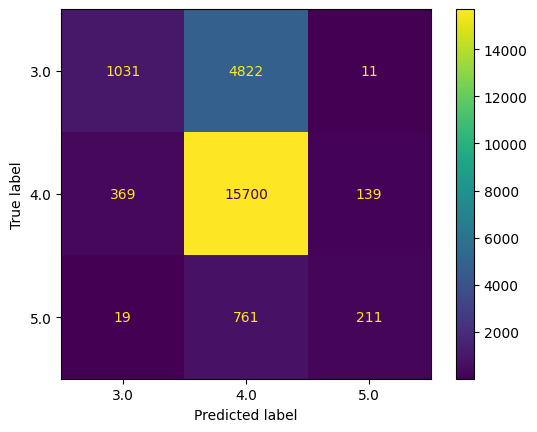

,mean,std
3.0_precision,0.726711,0.017953
3.0_recall,0.175816,0.013183
3.0_f1-score,0.282914,0.017620
4.0_precision,0.737684,0.001570
4.0_recall,0.968657,0.004072
4.0_f1-score,0.837532,0.001369
5.0_precision,0.586318,0.079768
5.0_recall,0.212960,0.035684
5.0_f1-score,0.311523,0.046724
accuracy,0.734597,0.002253


In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.1)
cross_val_report(mnb, X_train, y_train)[1]

In [16]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 1.5]}
results = tune_hyperparameter(mnb, param_grid, X_train, y_train)
results

Fitting 20 folds for each of 5 candidates, totalling 100 fits
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ......................................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.01},0.727131,0.048819,2,0.176498,0.022401,1,0.283549,0.030966,1,...,5,0.212735,0.053610,1,0.309696,0.068965,1,0.734684,0.008051,2
1,{'alpha': 0.1},0.726181,0.048915,3,0.176157,0.022362,2,0.283046,0.030956,2,...,4,0.208735,0.045497,2,0.306907,0.061090,2,0.734554,0.008023,5
2,{'alpha': 0.5},0.724196,0.053802,5,0.172405,0.021759,3,0.277991,0.030364,3,...,3,0.198694,0.042558,3,0.300951,0.058177,3,0.734684,0.007834,3
3,{'alpha': 1},0.725575,0.060055,4,0.167971,0.022737,4,0.272272,0.032508,4,...,2,0.168510,0.041996,4,0.271527,0.059746,4,0.735117,0.007914,1
4,{'alpha': 1.5},0.736079,0.056310,1,0.162855,0.021034,5,0.266112,0.029620,5,...,1,0.139204,0.041362,5,0.233495,0.064037,5,0.734597,0.006316,4


In [20]:
X_train

,PublishYear,PublishMonth,PublishDay,pagesNumber,gay_lesbian,twentieth_century,st_century,united_state,new_york,th_century,...,Publisher_wiley blackwell,Publisher_wiley interscience,Publisher_wisdom publications,Publisher_wrox press,Publisher_xlibris corporation,Publisher_zebra,Publisher_zondervan,Publisher_zondervan academic,Publisher_zondervan publishing company,Publisher_infrequent_sklearn
0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23059,13.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23060,12.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23061,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


MultinomialNB prediction took 0.4312922954559326 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.698718    0.185690      0.293405       0.735572    0.959284   
1       0.725352    0.175468      0.282579       0.737682    0.969772   
2       0.739726    0.184300      0.295082       0.737905    0.969155   
3       0.716418    0.163823      0.266667       0.735955    0.969772   
4       0.737931    0.182594      0.292750       0.736966    0.967921   
5       0.710345    0.175768      0.281806       0.738454    0.966687   
6       0.719008    0.148464      0.246110       0.733395    0.974090   
7       0.746377    0.175768      0.284530       0.738195    0.974090   
8       0.722581    0.190801      0.301887       0.738905    0.966049   
9       0.735294    0.170358      0.276625       0.737759    0.967284   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.832664       0.378378    0.141414      0.205882  0.727352  

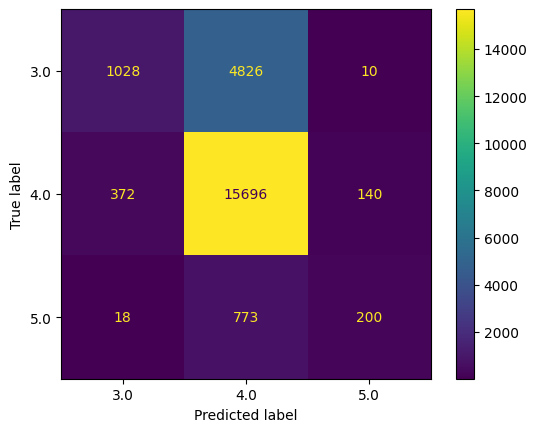

,mean,std
3.0_precision,0.725175,0.014786
3.0_recall,0.175303,0.012289
3.0_f1-score,0.282144,0.016231
4.0_precision,0.737079,0.001670
4.0_recall,0.968410,0.004244
4.0_f1-score,0.837051,0.001799
5.0_precision,0.575456,0.102340
5.0_recall,0.201859,0.037690
5.0_f1-score,0.297913,0.051409
accuracy,0.733816,0.002817


In [23]:
X_filtered = X_train.drop(['PublishDay', 'PublishMonth', 'PublishYear'], axis=1)
mnb = MultinomialNB(alpha=0.1)
cross_val_report(mnb, X_filtered, y_train)[1]

LinearSVC prediction took 25.80203604698181 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.725146    0.211244      0.327177       0.742135    0.960518   
1       0.732394    0.177172      0.285322       0.736867    0.969155   
2       0.701754    0.204778      0.317041       0.740161    0.962986   
3       0.718121    0.182594      0.291156       0.738006    0.967921   
4       0.737143    0.220137      0.339028       0.744175    0.965453   
5       0.687075    0.172355      0.275580       0.738084    0.964837   
6       0.744526    0.174061      0.282158       0.736572    0.972856   
7       0.732919    0.201365      0.315930       0.743371    0.968538   
8       0.791367    0.187394      0.303030       0.738195    0.974691   
9       0.726027    0.180579      0.289222       0.738432    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837322       0.447368    0.171717      0.248175  0.736021  
1   

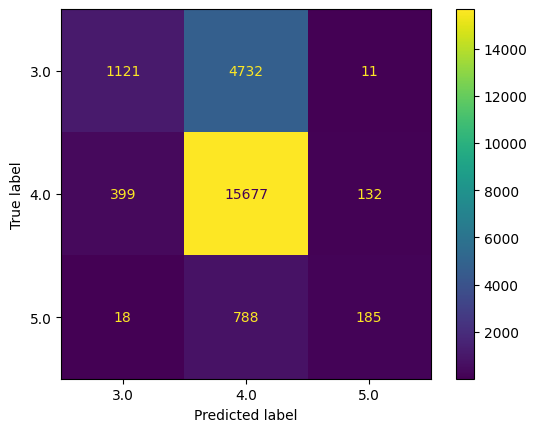

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.729647  0.027612
 3.0_recall     0.191168  0.016911
 3.0_f1-score   0.302564  0.021275
 4.0_precision  0.739600  0.002723
 4.0_recall     0.967239  0.004326
 4.0_f1-score   0.838230  0.001722
 5.0_precision  0.565419  0.072234
 5.0_recall     0.186737  0.036567
 5.0_f1-score   0.279482  0.046498
 accuracy       0.736374  0.003110)

In [13]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=30027)
cross_val_report(svm, X_train, y_train)

LinearSVC prediction took 13.085449934005737 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.737179    0.195911      0.309556       0.740057    0.964220   
1       0.736111    0.180579      0.290014       0.737905    0.969155   
2       0.743243    0.187713      0.299728       0.737459    0.970389   
3       0.724138    0.179181      0.287278       0.737905    0.969155   
4       0.801370    0.199659      0.319672       0.741436    0.974707   
5       0.682759    0.168942      0.270862       0.736693    0.964837   
6       0.766667    0.156997      0.260623       0.734013    0.977175   
7       0.751724    0.186007      0.298222       0.740845    0.973473   
8       0.760274    0.189097      0.302865       0.737805    0.970988   
9       0.740741    0.170358      0.277008       0.737189    0.967901   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837396       0.461538    0.181818      0.260870  0.735154  
1  

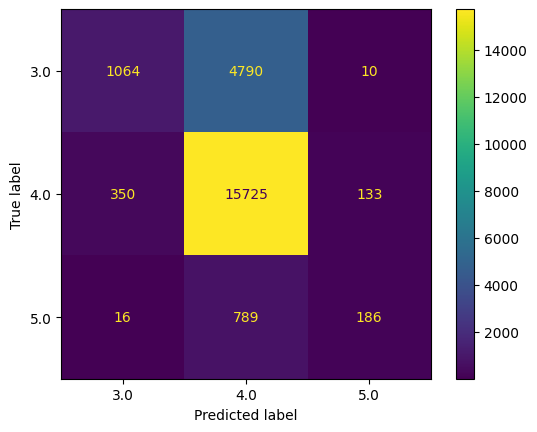

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.744421  0.030537
 3.0_recall     0.181444  0.013092
 3.0_f1-score   0.291583  0.018169
 4.0_precision  0.738131  0.002175
 4.0_recall     0.970200  0.004114
 4.0_f1-score   0.838397  0.001997
 5.0_precision  0.566511  0.071899
 5.0_recall     0.187758  0.037189
 5.0_f1-score   0.280650  0.046958
 accuracy       0.736027  0.003324)

In [26]:
cross_val_report(svm, X_filtered, y_train)

In [ ]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5]}
results = tune_hyperparameter(svm, param_grid, X_filtered, y_train, cv=2)
results

In [27]:
from sklearn.feature_selection import RFECV
selector = RFECV(svm, step=1, cv=3)
selector = selector.fit(X_filtered, y_train)

TypeError: 'numpy.ndarray' object is not callable

In [34]:
filtered_features = [X_filtered.columns[i] for i in range(X_filtered.shape[1]) if selector.support_[i]]
X_filtered2 = X_filtered[filtered_features]

LinearSVC prediction took 2.916057825088501 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.740260    0.194208      0.307692       0.739480    0.964837   
1       0.744828    0.183986      0.295082       0.739069    0.969772   
2       0.760274    0.189420      0.303279       0.738173    0.972239   
3       0.712329    0.177474      0.284153       0.737312    0.967921   
4       0.783217    0.191126      0.307270       0.739578    0.974090   
5       0.700680    0.175768      0.281037       0.739028    0.966070   
6       0.758333    0.155290      0.257790       0.733426    0.975941   
7       0.760563    0.184300      0.296703       0.740862    0.975324   
8       0.748299    0.187394      0.299728       0.737213    0.969753   
9       0.748092    0.166951      0.272981       0.736743    0.969136   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837259       0.473684    0.181818      0.262774  0.735154  
1   

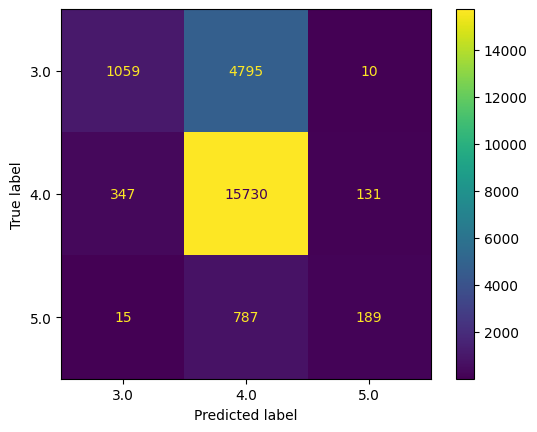

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.745687  0.023999
 3.0_recall     0.180592  0.012042
 3.0_f1-score   0.290571  0.016301
 4.0_precision  0.738088  0.002071
 4.0_recall     0.970508  0.003802
 4.0_f1-score   0.838485  0.001738
 5.0_precision  0.572573  0.071387
 5.0_recall     0.190788  0.041040
 5.0_f1-score   0.284694  0.051425
 accuracy       0.736157  0.002740)

In [36]:
cross_val_report(svm, X_filtered2, y_train)

In [38]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 20]}
results = tune_hyperparameter(svm, param_grid, X_filtered2, y_train, cv=2)
results

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.5; total time=   0.1s
[CV] END ..............................................C=0.5; total time=   0.1s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=2; total time=   0.3s
[CV] END ................................................C=2; total time=   0.3s
[CV] END ................................................C=5; total time=   0.6s
[CV] END ........................................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'C': 0.01},0.897321,0.040179,1,0.004604,0.000512,8,0.009162,0.001015,8,...,8,0.000000,0.000000,8,0.000000,0.000000,8,0.703811,0.000143,8
1,{'C': 0.1},0.672825,0.039750,8,0.082367,0.001194,7,0.146689,0.000945,7,...,1,0.059535,0.000949,7,0.109966,0.001352,7,0.715128,0.001573,7
2,{'C': 0.5},0.715650,0.012475,7,0.155014,0.003922,6,0.254827,0.006091,6,...,2,0.159437,0.002179,6,0.252589,0.002188,6,0.730044,0.001573,6
3,{'C': 1},0.716190,0.011222,6,0.158424,0.003581,5,0.259454,0.005539,5,...,3,0.168520,0.003197,5,0.262154,0.003886,5,0.730521,0.001356,5
4,{'C': 2},0.720251,0.009520,5,0.159447,0.003581,4,0.261091,0.005427,4,...,4,0.175580,0.000177,4,0.270189,0.000839,4,0.730998,0.001139,4
5,{'C': 5},0.725110,0.007922,2,0.161153,0.004604,3,0.263687,0.006688,3,...,5,0.177603,0.004216,3,0.272025,0.006182,3,0.731561,0.001009,2
6,{'C': 10},0.724855,0.009685,4,0.161835,0.004263,2,0.264588,0.006344,2,...,7,0.178611,0.003207,2,0.272950,0.005257,2,0.731561,0.001009,2
7,{'C': 20},0.725055,0.009885,3,0.162005,0.004434,1,0.264829,0.006584,1,...,6,0.179619,0.002199,1,0.274280,0.003927,1,0.731648,0.001096,1


In [12]:
svm = LinearSVC(random_state=30027, C=5, class_weight='balanced')
cross_val_report(svm, X_filtered2, y_train)

NameError: name 'LinearSVC' is not defined

In [ ]:
selector = RFECV(svm, step=1, cv=3)
selector = selector.fit(X_filtered2, y_train)

HistGradientBoostingClassifier prediction took 17.854812145233154 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.542714    0.055243      0.100279       0.710389    0.983343   
1       0.529954    0.058854      0.105942       0.711296    0.981307   
2       0.619048    0.059847      0.109142       0.712472    0.986672   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.824872       0.800000    0.024242      0.047059  0.706165  
1      0.824765       0.941176    0.048338      0.091954  0.706686  
2      0.827447       0.764706    0.039394      0.074928  0.710290  


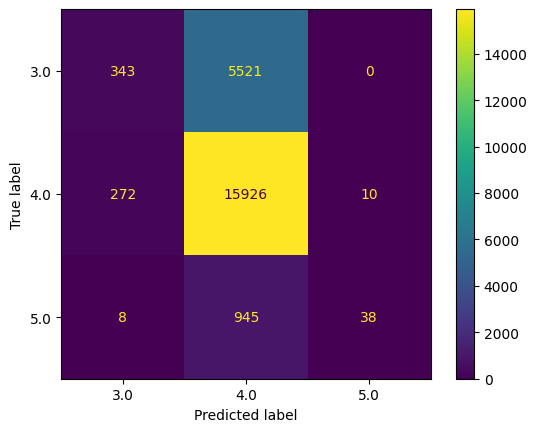

(array([4., 4., 4., ..., 4., 4., 4.]),
                    mean       std
 3.0_precision  0.563905  0.048179
 3.0_recall     0.057981  0.002423
 3.0_f1-score   0.105121  0.004488
 4.0_precision  0.711386  0.001044
 4.0_recall     0.983774  0.002708
 4.0_f1-score   0.825695  0.001519
 5.0_precision  0.835294  0.093379
 5.0_recall     0.037325  0.012180
 5.0_f1-score   0.071314  0.022665
 accuracy       0.707714  0.002246)

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
cross_val_report(hgbc, X_train, y_train, cv=3)

HistGradientBoostingClassifier prediction took 15.155688762664795 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.339629    0.478261      0.397196       0.775789    0.441236   
1       0.338451    0.518936      0.409697       0.784886    0.413289   
2       0.334001    0.511509      0.404122       0.777124    0.391151   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.562529       0.088614    0.500000      0.150547  0.453174  
1      0.541465       0.087710    0.489426      0.148760  0.443418  
2      0.520379       0.086626    0.518182      0.148438  0.427215  


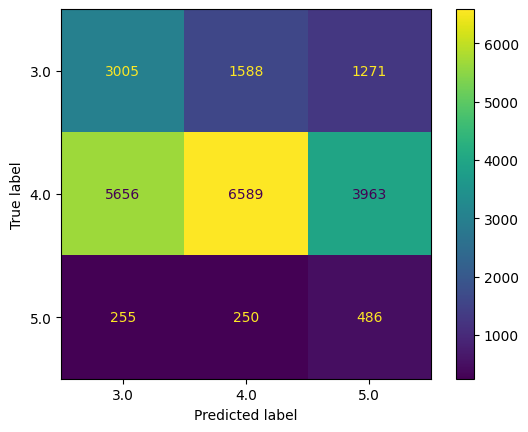

(array([3., 5., 3., ..., 3., 5., 4.]),
                    mean       std
 3.0_precision  0.337361  0.002968
 3.0_recall     0.502902  0.021660
 3.0_f1-score   0.403672  0.006263
 4.0_precision  0.779266  0.004912
 4.0_recall     0.415226  0.025099
 4.0_f1-score   0.541458  0.021075
 5.0_precision  0.087650  0.000995
 5.0_recall     0.502536  0.014545
 5.0_f1-score   0.149248  0.001137
 accuracy       0.441269  0.013112)

In [14]:
cross_val_report(HistGradientBoostingClassifier(l2_regularization=1, class_weight='balanced'), X_train, y_train, cv=3)

In [16]:
hgbc = HistGradientBoostingClassifier(l2_regularization=1, class_weight='balanced').fit(X_train, y_train)

In [17]:
hgbc.train_score_

array([-1.09861228, -1.07367095, -1.0546447 , -1.03931932, -1.02721937,
       -1.01641876, -1.00670953, -0.99800073, -0.9903948 , -0.98335343,
       -0.9768814 , -0.97101639, -0.96510443, -0.95921792, -0.95427912,
       -0.94928106, -0.94515175, -0.94078669, -0.93674067, -0.93327258,
       -0.92951785, -0.9260615 , -0.92280734, -0.91992417, -0.91723419,
       -0.91457426, -0.91149804, -0.90887967, -0.90666876, -0.90420223,
       -0.90179277, -0.8996737 , -0.8974717 , -0.89559897])

In [18]:
hgbc.validation_score_

array([-1.09861237, -1.0819325 , -1.07046385, -1.06197826, -1.05684544,
       -1.05257732, -1.04897806, -1.04619336, -1.04390259, -1.04133105,
       -1.03912085, -1.03708067, -1.03414555, -1.03201479, -1.0306576 ,
       -1.02983562, -1.02941492, -1.02872664, -1.02723978, -1.02712912,
       -1.02557837, -1.02488182, -1.02283288, -1.02183468, -1.02345227,
       -1.02302214, -1.02319131, -1.02450999, -1.02361428, -1.02590695,
       -1.02515441, -1.02448708, -1.02378429, -1.02349755])